## 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../ssd_data/combined_by_diskmodel/combined_MB2.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

disk_id        ds model  n_1  r_1    n_5  r_5   n_9      r_9  n_12  \
0            100  20190101   MB2  NaN  NaN  100.0  0.0  96.0  20012.0  99.0   
29067      34365  20190101   MB2  NaN  NaN  100.0  0.0  95.0  20881.0  99.0   
29068      34382  20190101   MB2  NaN  NaN  100.0  0.0  96.0  17911.0  99.0   
29069      34397  20190101   MB2  NaN  NaN  100.0  0.0  95.0  20272.0  99.0   
29070      34418  20190101   MB2  NaN  NaN  100.0  0.0  95.0  20562.0  99.0   
...          ...       ...   ...  ...  ...    ...  ...   ...      ...   ...   
7725412    21806  20190630   MB2  NaN  NaN  100.0  0.0  95.0  24987.0  99.0   
7725413    21811  20190630   MB2  NaN  NaN  100.0  0.0  93.0  31438.0  98.0   
7725414    21818  20190630   MB2  NaN  NaN  100.0  0.0  93.0  31443.0  98.0   
7725406    21658  20190630   MB2  NaN  NaN  100.0  0.0  95.0  23549.0  99.0   
7754102     9989  20190630   MB2  NaN  NaN  100.0  0.0  95.0  24422.0  99.0   

         ...  n_233  n_241         r_241  n_242         r_242  r_244  n_175  \
0        ...    NaN   99.0  6.916669e+10   99.0  4.377350e+09    0.0    NaN   
29067    ...    NaN   99.0  1.013831e+12   99.0  6.677894e+11    0.0    NaN   
29068    ...    NaN   99.0  2.286572e+12   99.0  4.380341e+11    0.0    NaN   
29069    ...    NaN   99.0  6.670700e+11   99.0  4.956816e+11    0.0    NaN   
29070    ...    NaN   99.0  4.731031e+11   99.0  1.697450e+10    0.0    NaN   
...      ...    ...    ...           ...    ...           ...    ...    ...   
7725412  ...    NaN   99.0  7.368685e+11   99.0  1.350921e+12    0.0    NaN   
7725413  ...    NaN   99.0  1.381409e+12   99.0  4.058834e+11    0.0    NaN   
7725414  ...    NaN   99.0  1.403214e+12   99.0  4.113683e+11    0.0    NaN   
7725406  ...    NaN   99.0  2.474254e+11   99.0  1.035013e+12    0.0    NaN   
7754102  ...    NaN   99.0  3.281347e+11   99.0  4.228293e+11    0.0    NaN   

         r_175  n_232  label  
0          NaN    NaN      0  
29067      NaN    NaN      0  
29068      NaN    NaN      0  
29069      NaN    NaN      0  
29070      NaN    NaN      0  
...        ...    ...    ...  
7725412    NaN    NaN      0  
7725413    NaN    NaN      0  
7725414    NaN    NaN      0  
7725406    NaN    NaN      0  
7754102    NaN    NaN      0  

[7754103 rows x 59 columns]

In [3]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    return df

data = remove_null_columns(data)
data

disk_id        ds model    n_5  r_5   n_9      r_9  n_12    r_12  \
0            100  20190101   MB2  100.0  0.0  96.0  20012.0  99.0    57.0   
29067      34365  20190101   MB2  100.0  0.0  95.0  20881.0  99.0    21.0   
29068      34382  20190101   MB2  100.0  0.0  96.0  17911.0  99.0    21.0   
29069      34397  20190101   MB2  100.0  0.0  95.0  20272.0  99.0    12.0   
29070      34418  20190101   MB2  100.0  0.0  95.0  20562.0  99.0    33.0   
...          ...       ...   ...    ...  ...   ...      ...   ...     ...   
7725412    21806  20190630   MB2  100.0  0.0  95.0  24987.0  99.0    20.0   
7725413    21811  20190630   MB2  100.0  0.0  93.0  31438.0  98.0  1014.0   
7725414    21818  20190630   MB2  100.0  0.0  93.0  31443.0  98.0  1057.0   
7725406    21658  20190630   MB2  100.0  0.0  95.0  23549.0  99.0    28.0   
7754102     9989  20190630   MB2  100.0  0.0  95.0  24422.0  99.0    11.0   

         n_177  ...  r_195  r_197  n_199  r_199  n_241         r_241  n_242  \
0         99.0  ...    0.0    0.0  100.0    0.0   99.0  6.916669e+10   99.0   
29067     98.0  ...    0.0    0.0  100.0    0.0   99.0  1.013831e+12   99.0   
29068     98.0  ...    0.0    0.0  100.0    0.0   99.0  2.286572e+12   99.0   
29069     99.0  ...    0.0    0.0  100.0    0.0   99.0  6.670700e+11   99.0   
29070     98.0  ...    0.0    0.0  100.0    0.0   99.0  4.731031e+11   99.0   
...        ...  ...    ...    ...    ...    ...    ...           ...    ...   
7725412   99.0  ...    0.0    0.0  100.0    0.0   99.0  7.368685e+11   99.0   
7725413   98.0  ...    0.0    0.0  100.0    0.0   99.0  1.381409e+12   99.0   
7725414   98.0  ...    0.0    0.0  100.0    0.0   99.0  1.403214e+12   99.0   
7725406   99.0  ...    0.0    0.0  100.0    0.0   99.0  2.474254e+11   99.0   
7754102   99.0  ...    0.0    0.0  100.0    0.0   99.0  3.281347e+11   99.0   

                r_242  r_244  label  
0        4.377350e+09    0.0      0  
29067    6.677894e+11    0.0      0  
29068    4.380341e+11    0.0      0  
29069    4.956816e+11    0.0      0  
29070    1.697450e+10    0.0      0  
...               ...    ...    ...  
7725412  1.350921e+12    0.0      0  
7725413  4.058834e+11    0.0      0  
7725414  4.113683e+11    0.0      0  
7725406  1.035013e+12    0.0      0  
7754102  4.228293e+11    0.0      0  

[7754103 rows x 36 columns]

In [3]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

filtered_data = remove_single_value_columns(data)
filtered_data

['model', 'n_184', 'r_184', 'r_197']


disk_id        ds    n_5  r_5   n_9      r_9  n_12    r_12  n_177  \
0            100  20190101  100.0  0.0  96.0  20012.0  99.0    57.0   99.0   
29067      34365  20190101  100.0  0.0  95.0  20881.0  99.0    21.0   98.0   
29068      34382  20190101  100.0  0.0  96.0  17911.0  99.0    21.0   98.0   
29069      34397  20190101  100.0  0.0  95.0  20272.0  99.0    12.0   99.0   
29070      34418  20190101  100.0  0.0  95.0  20562.0  99.0    33.0   98.0   
...          ...       ...    ...  ...   ...      ...   ...     ...    ...   
7725412    21806  20190630  100.0  0.0  95.0  24987.0  99.0    20.0   99.0   
7725413    21811  20190630  100.0  0.0  93.0  31438.0  98.0  1014.0   98.0   
7725414    21818  20190630  100.0  0.0  93.0  31443.0  98.0  1057.0   98.0   
7725406    21658  20190630  100.0  0.0  95.0  23549.0  99.0    28.0   99.0   
7754102     9989  20190630  100.0  0.0  95.0  24422.0  99.0    11.0   99.0   

         r_177  ...  n_195  r_195  n_199  r_199  n_241         r_241  n_242  \
0         20.0  ...  200.0    0.0  100.0    0.0   99.0  6.916669e+10   99.0   
29067    702.0  ...  200.0    0.0  100.0    0.0   99.0  1.013831e+12   99.0   
29068    711.0  ...  200.0    0.0  100.0    0.0   99.0  2.286572e+12   99.0   
29069    218.0  ...  200.0    0.0  100.0    0.0   99.0  6.670700e+11   99.0   
29070    394.0  ...  200.0    0.0  100.0    0.0   99.0  4.731031e+11   99.0   
...        ...  ...    ...    ...    ...    ...    ...           ...    ...   
7725412  285.0  ...  200.0    0.0  100.0    0.0   99.0  7.368685e+11   99.0   
7725413  592.0  ...  200.0    0.0  100.0    0.0   99.0  1.381409e+12   99.0   
7725414  602.0  ...  200.0    0.0  100.0    0.0   99.0  1.403214e+12   99.0   
7725406   68.0  ...  200.0    0.0  100.0    0.0   99.0  2.474254e+11   99.0   
7754102  223.0  ...  200.0    0.0  100.0    0.0   99.0  3.281347e+11   99.0   

                r_242  r_244  label  
0        4.377350e+09    0.0      0  
29067    6.677894e+11    0.0      0  
29068    4.380341e+11    0.0      0  
29069    4.956816e+11    0.0      0  
29070    1.697450e+10    0.0      0  
...               ...    ...    ...  
7725412  1.350921e+12    0.0      0  
7725413  4.058834e+11    0.0      0  
7725414  4.113683e+11    0.0      0  
7725406  1.035013e+12    0.0      0  
7754102  4.228293e+11    0.0      0  

[7754103 rows x 32 columns]

NaN갑과 특정 숫자 하나만 가지는 feature가 존재하는데, 제거하지 않고 일단 남겨놓고 진행

## EDA

In [4]:
print(data.shape)
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]
nan_stats

(7754103, 36)


r_183      0.000070
n_183      0.000070
r_184      0.000066
n_184      0.000066
n_182      0.000066
r_182      0.000066
n_195      0.000066
r_195      0.000066
r_187      0.000065
n_187      0.000065
n_181      0.000065
r_181      0.000065
r_190      0.000065
n_190      0.000065
r_197      0.000065
r_244      0.000064
r_199      0.000064
n_199      0.000064
r_241      0.000064
n_241      0.000064
r_180      0.000063
n_180      0.000063
r_242      0.000063
n_242      0.000063
r_177      0.000062
n_177      0.000062
r_9        0.000061
n_9        0.000061
r_5        0.000061
n_5        0.000061
n_12       0.000061
r_12       0.000061
disk_id    0.000000
ds         0.000000
model      0.000000
label      0.000000
dtype: float64

In [5]:
features_data = data.drop(columns=['disk_id','ds','model'])
features_info=features_data.describe()

In [6]:
features_info.iloc[:,:14]

n_5           r_5           n_9           r_9          n_12  \
count  7.753629e+06  7.753629e+06  7.753628e+06  7.753628e+06  7.753631e+06   
mean   9.991795e+01  1.165114e+01  9.500852e+01  2.268798e+04  9.899799e+01   
std    9.641315e-01  1.426834e+02  6.049581e-01  2.952161e+03  1.668990e-01   
min    7.000000e+01  0.000000e+00  9.300000e+01  4.000000e+00  6.800000e+01   
25%    1.000000e+02  0.000000e+00  9.500000e+01  2.138500e+04  9.900000e+01   
50%    1.000000e+02  0.000000e+00  9.500000e+01  2.279100e+04  9.900000e+01   
75%    1.000000e+02  0.000000e+00  9.500000e+01  2.418100e+04  9.900000e+01   
max    1.000000e+02  4.580000e+03  9.900000e+01  3.389500e+04  9.900000e+01   

               r_12         n_177         r_177         n_180         r_180  \
count  7.753631e+06  7.753626e+06  7.753626e+06  7.753615e+06  7.753615e+06   
mean   2.842249e+01  9.842696e+01  4.019918e+02  9.991795e+01  1.529830e+04   
std    1.735408e+02  1.067715e+00  4.303988e+02  9.641455e-01  1.461884e+02   
min    2.000000e+00  8.200000e+01  0.000000e+00  7.000000e+01  1.070000e+04   
25%    1.700000e+01  9.800000e+01  1.440000e+02  1.000000e+02  1.529000e+04   
50%    2.400000e+01  9.900000e+01  2.730000e+02  1.000000e+02  1.531200e+04   
75%    3.100000e+01  9.900000e+01  5.630000e+02  1.000000e+02  1.533200e+04   
max    3.133400e+04  1.000000e+02  6.906000e+03  1.000000e+02  1.540300e+04   

              n_181         r_181         n_182         r_182  
count  7.753597e+06  7.753597e+06  7.753593e+06  7.753593e+06  
mean   9.992203e+01  1.122222e+01  9.999696e+01  2.778505e-01  
std    9.429025e-01  1.395693e+02  1.571446e-01  2.283994e+01  
min    7.700000e+01  0.000000e+00  7.500000e+01  0.000000e+00  
25%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
50%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
75%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
max    1.000000e+02  3.407000e+03  1.000000e+02  3.767000e+03

In [7]:
features_info.iloc[:,14:28]

n_183         r_183      n_184      r_184         n_187  \
count  7.753562e+06  7.753562e+06  7753588.0  7753588.0  7.753596e+06   
mean   9.991795e+01  1.165136e+01      100.0        0.0  9.999989e+01   
std    9.641380e-01  1.426843e+02        0.0        0.0  1.529525e-02   
min    7.000000e+01  0.000000e+00      100.0        0.0  7.400000e+01   
25%    1.000000e+02  0.000000e+00      100.0        0.0  1.000000e+02   
50%    1.000000e+02  0.000000e+00      100.0        0.0  1.000000e+02   
75%    1.000000e+02  0.000000e+00      100.0        0.0  1.000000e+02   
max    1.000000e+02  4.580000e+03      100.0        0.0  1.000000e+02   

              r_187         n_190         r_190         n_195         r_195  \
count  7.753596e+06  7.753598e+06  7.753598e+06  7.753595e+06  7.753595e+06   
mean   3.126507e-01  7.095565e+01  2.904416e+01  1.999991e+02  3.126507e-01   
std    1.180770e+02  2.545035e+00  2.545094e+00  4.043880e-01  1.180771e+02   
min    0.000000e+00  5.300000e+01  0.000000e+00  1.000000e+00  0.000000e+00   
25%    0.000000e+00  6.900000e+01  2.700000e+01  2.000000e+02  0.000000e+00   
50%    0.000000e+00  7.100000e+01  2.900000e+01  2.000000e+02  0.000000e+00   
75%    0.000000e+00  7.300000e+01  3.100000e+01  2.000000e+02  0.000000e+00   
max    2.551570e+05  1.000000e+02  4.700000e+01  2.000000e+02  2.551570e+05   

           r_197         n_199         r_199         n_241  
count  7753599.0  7.753604e+06  7.753604e+06  7.753610e+06  
mean         0.0  9.989119e+01  6.429886e+01  9.898756e+01  
std          0.0  1.711256e+00  3.395441e+03  1.398967e-01  
min          0.0  1.000000e+00  0.000000e+00  9.500000e+01  
25%          0.0  1.000000e+02  0.000000e+00  9.900000e+01  
50%          0.0  1.000000e+02  0.000000e+00  9.900000e+01  
75%          0.0  1.000000e+02  0.000000e+00  9.900000e+01  
max          0.0  1.000000e+02  2.941240e+05  1.000000e+02

In [8]:
features_info.iloc[:,28:]

r_241         n_242         r_242         r_244         label
count  7.753610e+06  7.753618e+06  7.753618e+06  7.753604e+06  7.754103e+06
mean   6.936521e+11  9.899751e+01  4.052783e+11  2.602003e-02  6.319235e-06
std    6.267885e+11  6.515562e-02  4.164140e+11  5.333887e+00  2.513801e-03
min    0.000000e+00  9.200000e+01  9.290000e+02  0.000000e+00  0.000000e+00
25%    3.287944e+11  9.900000e+01  7.352187e+10  0.000000e+00  0.000000e+00
50%    6.087528e+11  9.900000e+01  3.677861e+11  0.000000e+00  0.000000e+00
75%    8.798607e+11  9.900000e+01  5.907394e+11  0.000000e+00  0.000000e+00
max    1.407352e+13  9.900000e+01  2.166805e+13  1.115000e+03  1.000000e+00

<AxesSubplot:>

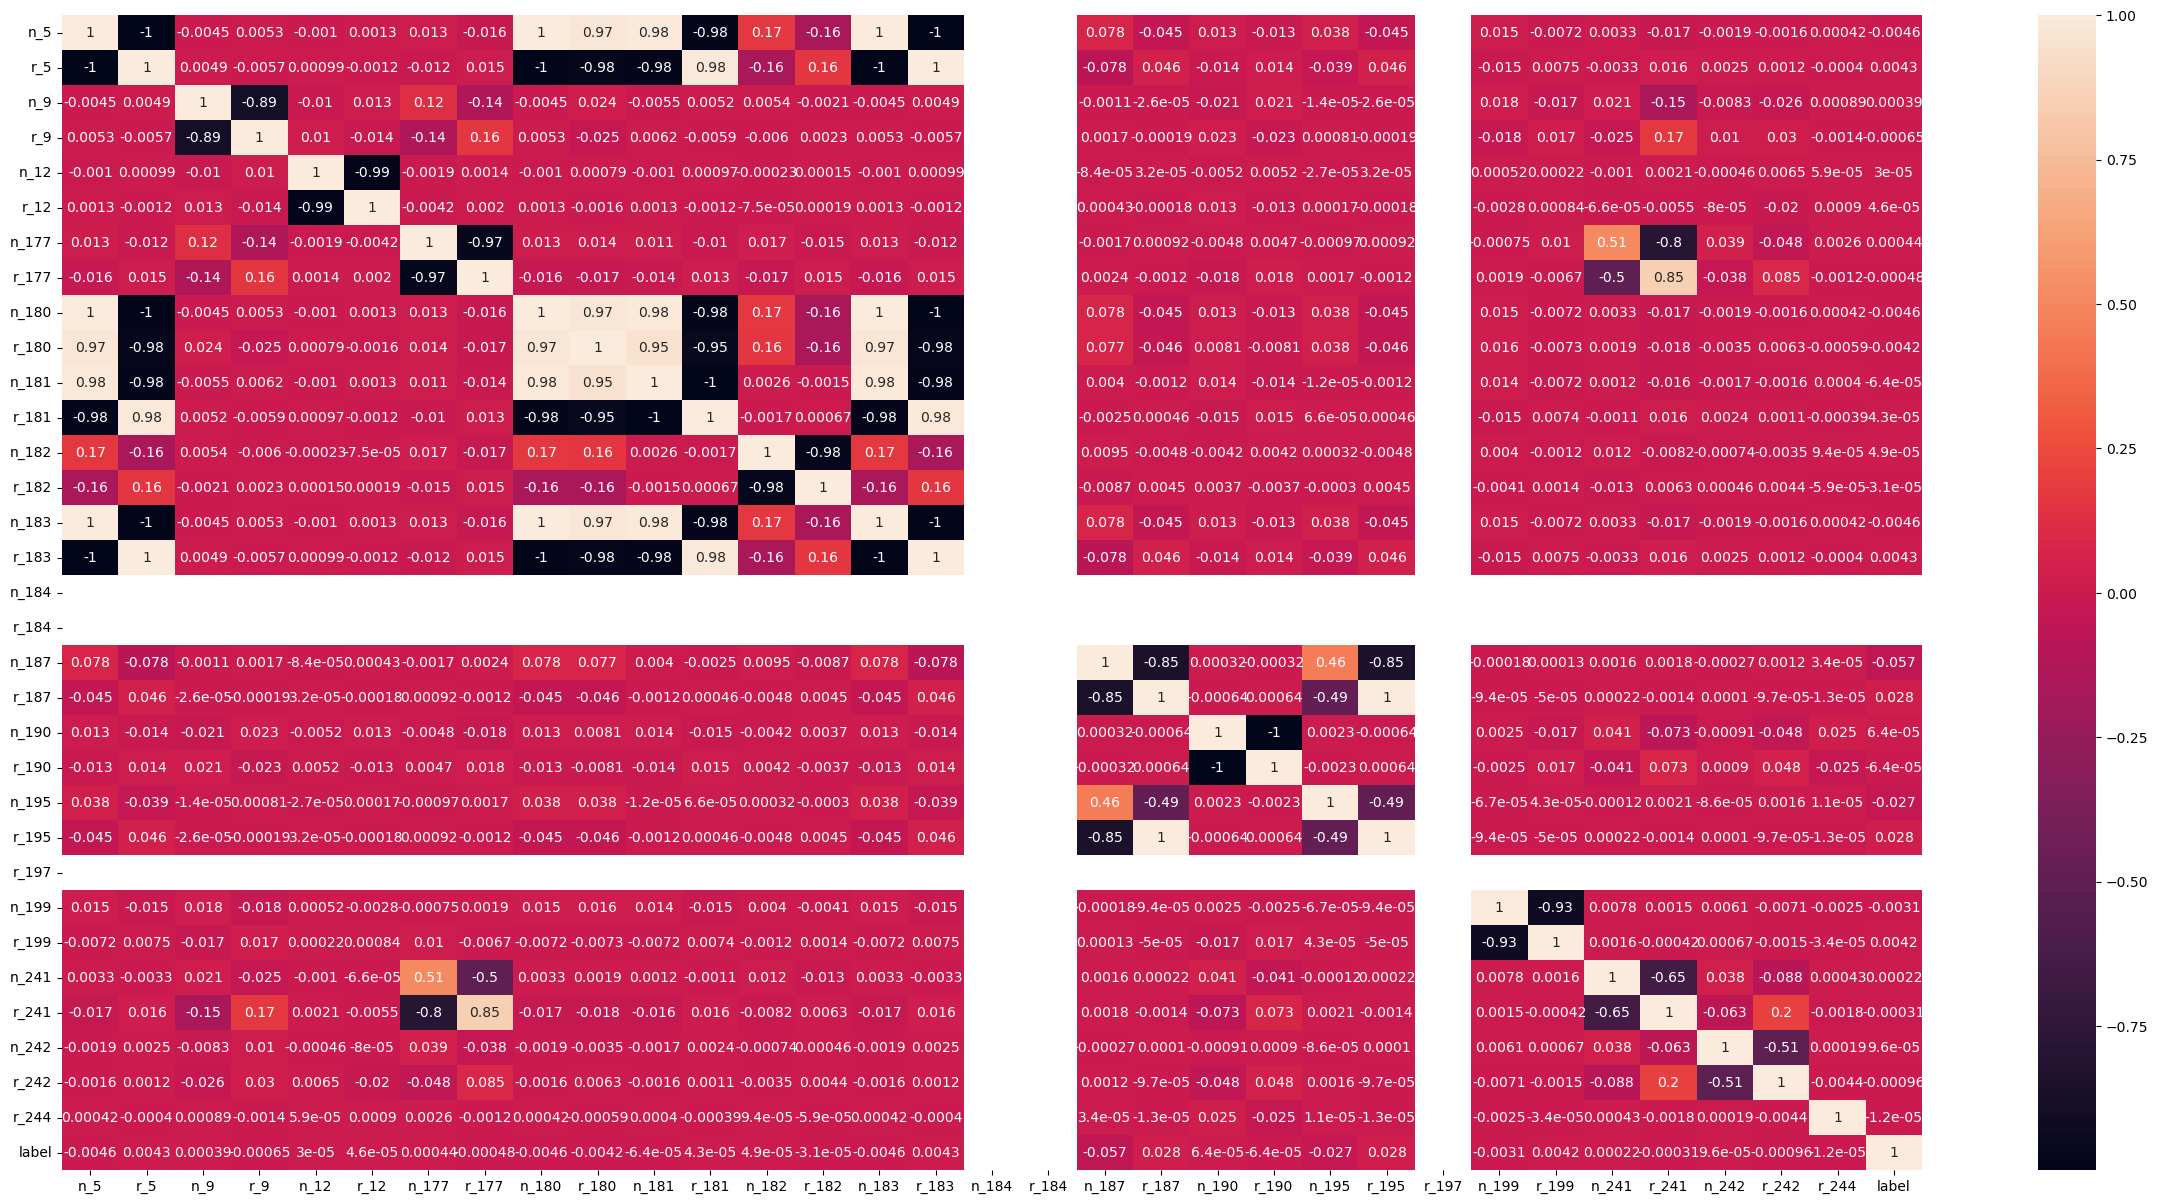

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서
corr = features_data.corr()
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [10]:
# 상관계수의 절대값이 0.4 이상인 셀만 선택
corr_np = np.abs(corr.values)
mask = corr_np > 0.4

# 선택한 셀의 행렬에서 대각선을 제거(자기 자신과의 상관계수는 항상 1)
mask[np.triu_indices_from(mask, k=1)] = False

# 마스크 적용
high_corr = corr_np[mask]

# 해당하는 feature 쌍 print
high_corr_pairs = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] and i != j:  # 추가된 부분: i와 j가 같지 않을 때만 추가
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(high_corr_pairs)

[('r_5', 'n_5'), ('r_9', 'n_9'), ('r_12', 'n_12'), ('r_177', 'n_177'), ('n_180', 'n_5'), ('n_180', 'r_5'), ('r_180', 'n_5'), ('r_180', 'r_5'), ('r_180', 'n_180'), ('n_181', 'n_5'), ('n_181', 'r_5'), ('n_181', 'n_180'), ('n_181', 'r_180'), ('r_181', 'n_5'), ('r_181', 'r_5'), ('r_181', 'n_180'), ('r_181', 'r_180'), ('r_181', 'n_181'), ('r_182', 'n_182'), ('n_183', 'n_5'), ('n_183', 'r_5'), ('n_183', 'n_180'), ('n_183', 'r_180'), ('n_183', 'n_181'), ('n_183', 'r_181'), ('r_183', 'n_5'), ('r_183', 'r_5'), ('r_183', 'n_180'), ('r_183', 'r_180'), ('r_183', 'n_181'), ('r_183', 'r_181'), ('r_183', 'n_183'), ('r_187', 'n_187'), ('r_190', 'n_190'), ('n_195', 'n_187'), ('n_195', 'r_187'), ('r_195', 'n_187'), ('r_195', 'r_187'), ('r_195', 'n_195'), ('r_199', 'n_199'), ('n_241', 'n_177'), ('n_241', 'r_177'), ('r_241', 'n_177'), ('r_241', 'r_177'), ('r_241', 'n_241'), ('r_242', 'n_242')]


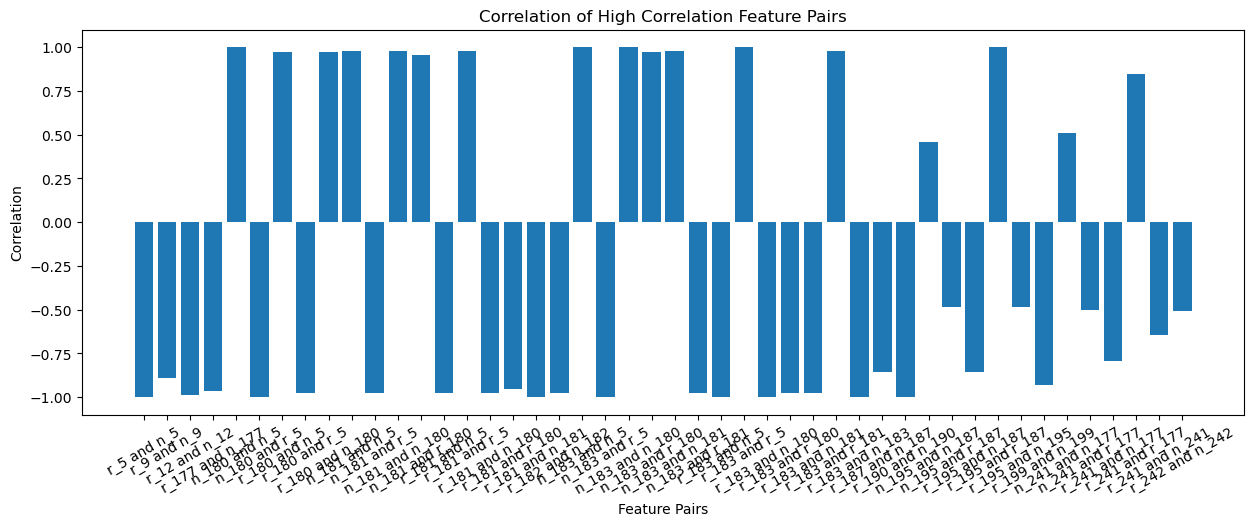

In [11]:
import matplotlib.pyplot as plt

# 상관계수 값 가져오기
high_corr_values = [corr.loc[pair] for pair in high_corr_pairs]

# 특성 쌍 이름 가져오기
pair_names = [f"{pair[0]} and {pair[1]}" for pair in high_corr_pairs]

# bar plot 그리기
plt.figure(figsize=(15, 5))
plt.bar(pair_names, high_corr_values)
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation')
plt.title('Correlation of High Correlation Feature Pairs')
plt.xticks(rotation=30)
plt.show()

## About healthy data

#### label = 0 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

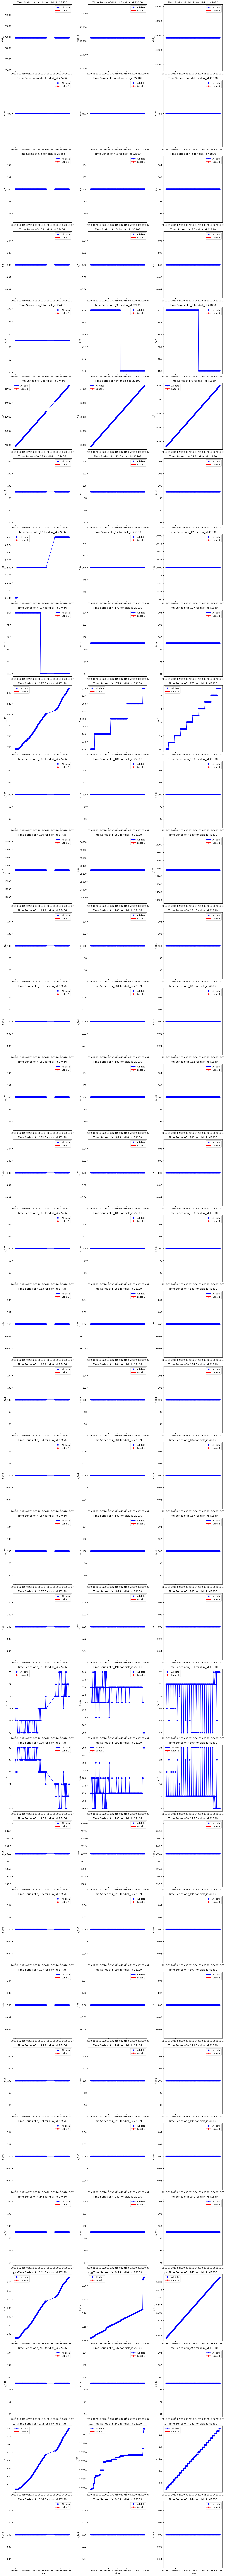

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

#### label = 0 인 데이터 중, r_9값이 작은순서대로 3개에 대해서 feature plot 그려보기

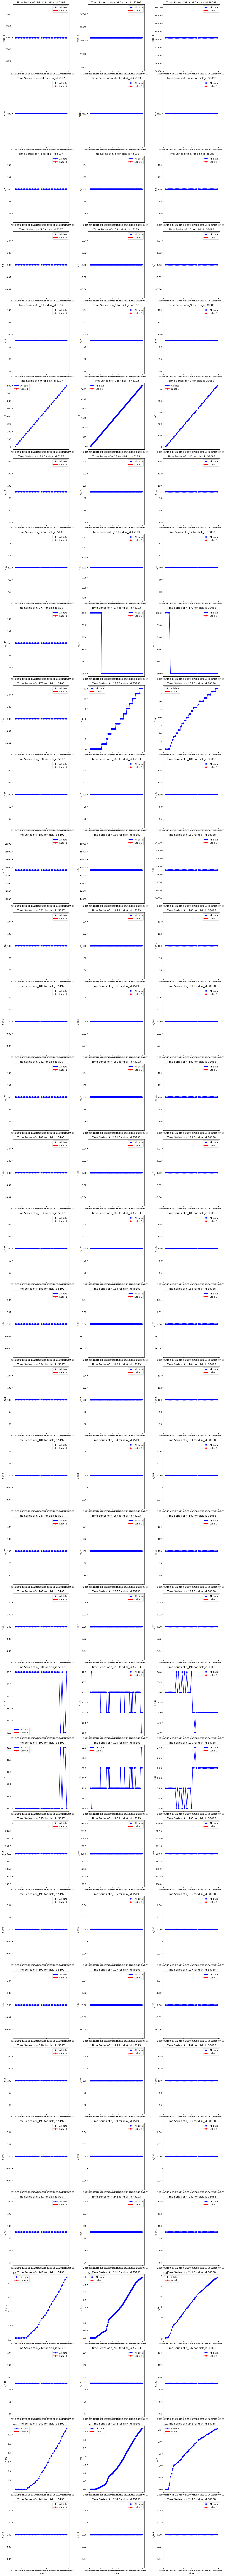

In [12]:
# label = 0인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

In [19]:
data[data['disk_id']==5197]

disk_id        ds model    n_5  r_5   n_9    r_9  n_12  r_12  n_177  \
6325204     5197  20190528   MB2  100.0  0.0  99.0    4.0  99.0   5.0  100.0   
6406147     5197  20190529   MB2  100.0  0.0  99.0   28.0  99.0   5.0  100.0   
6429987     5197  20190530   MB2  100.0  0.0  99.0   52.0  99.0   5.0  100.0   
6489616     5197  20190531   MB2  100.0  0.0  99.0   76.0  99.0   5.0  100.0   
6507340     5197  20190601   MB2  100.0  0.0  99.0  100.0  99.0   5.0  100.0   
6556699     5197  20190602   MB2  100.0  0.0  99.0  124.0  99.0   5.0  100.0   
6627787     5197  20190603   MB2  100.0  0.0  99.0  148.0  99.0   5.0  100.0   
6659299     5197  20190604   MB2  100.0  0.0  99.0  172.0  99.0   5.0  100.0   
6702557     5197  20190605   MB2  100.0  0.0  99.0  196.0  99.0   5.0  100.0   
6724028     5197  20190606   MB2  100.0  0.0  99.0  220.0  99.0   5.0  100.0   
6785173     5197  20190607   MB2  100.0  0.0  99.0  244.0  99.0   5.0  100.0   
6824665     5197  20190608   MB2  100.0  0.0  99.0  268.0  99.0   5.0  100.0   
6870190     5197  20190609   MB2  100.0  0.0  99.0  292.0  99.0   5.0  100.0   
6895635     5197  20190610   MB2  100.0  0.0  99.0  316.0  99.0   5.0  100.0   
6937059     5197  20190611   MB2  100.0  0.0  99.0  340.0  99.0   5.0  100.0   
6978585     5197  20190612   MB2  100.0  0.0  99.0  364.0  99.0   5.0  100.0   
7024229     5197  20190614   MB2  100.0  0.0  99.0  412.0  99.0   5.0  100.0   
7075130     5197  20190615   MB2  100.0  0.0  99.0  436.0  99.0   5.0  100.0   
7130189     5197  20190616   MB2  100.0  0.0  99.0  460.0  99.0   5.0  100.0   
7169407     5197  20190617   MB2  100.0  0.0  99.0  484.0  99.0   5.0  100.0   
7214378     5197  20190618   MB2  100.0  0.0  99.0  508.0  99.0   5.0  100.0   
7245575     5197  20190619   MB2  100.0  0.0  99.0  532.0  99.0   5.0  100.0   
7287212     5197  20190620   MB2  100.0  0.0  99.0  556.0  99.0   5.0  100.0   
7342178     5197  20190621   MB2  100.0  0.0  99.0  580.0  99.0   5.0  100.0   
7403421     5197  20190622   MB2  100.0  0.0  99.0  604.0  99.0   5.0  100.0   
7436647     5197  20190623   MB2  100.0  0.0  99.0  628.0  99.0   5.0  100.0   
7483947     5197  20190624   MB2  100.0  0.0  99.0  652.0  99.0   5.0  100.0   
7511541     5197  20190625   MB2  100.0  0.0  99.0  676.0  99.0   5.0  100.0   
7539063     5197  20190626   MB2  100.0  0.0  99.0  700.0  99.0   5.0  100.0   
7601657     5197  20190627   MB2  100.0  0.0  99.0  724.0  99.0   5.0  100.0   
7665229     5197  20190628   MB2  100.0  0.0  99.0  748.0  99.0   5.0  100.0   
7691046     5197  20190629   MB2  100.0  0.0  99.0  772.0  99.0   5.0  100.0   
7738459     5197  20190630   MB2  100.0  0.0  99.0  796.0  99.0   5.0  100.0   

         ...  r_195  r_197  n_199  r_199  n_241         r_241  n_242  \
6325204  ...    0.0    0.0  100.0    0.0   99.0  5.890487e+07   99.0   
6406147  ...    0.0    0.0  100.0    0.0   99.0  5.927610e+07   99.0   
6429987  ...    0.0    0.0  100.0    0.0   99.0  5.964926e+07   99.0   
6489616  ...    0.0    0.0  100.0    0.0   99.0  6.002237e+07   99.0   
6507340  ...    0.0    0.0  100.0    0.0   99.0  6.039536e+07   99.0   
6556699  ...    0.0    0.0  100.0    0.0   99.0  6.076819e+07   99.0   
6627787  ...    0.0    0.0  100.0    0.0   99.0  6.114146e+07   99.0   
6659299  ...    0.0    0.0  100.0    0.0   99.0  6.151439e+07   99.0   
6702557  ...    0.0    0.0  100.0    0.0   99.0  1.202642e+08   99.0   
6724028  ...    0.0    0.0  100.0    0.0   99.0  1.761063e+08   99.0   
6785173  ...    0.0    0.0  100.0    0.0   99.0  2.315423e+08   99.0   
6824665  ...    0.0    0.0  100.0    0.0   99.0  2.861674e+08   99.0   
6870190  ...    0.0    0.0  100.0    0.0   99.0  3.286013e+08   99.0   
6895635  ...    0.0    0.0  100.0    0.0   99.0  3.862818e+08   99.0   
6937059  ...    0.0    0.0  100.0    0.0   99.0  4.463028e+08   99.0   
6978585  ...    0.0    0.0  100.0    0.0   99.0  5.335716e+08   99.0   
7024229  ...    0.0    0.0  100.0    0.0   99.0  7.453949e+08   

데이터 값은 20190528에 처음 나타나고, r_9값도 이때 0부터 시작

## About Failed data

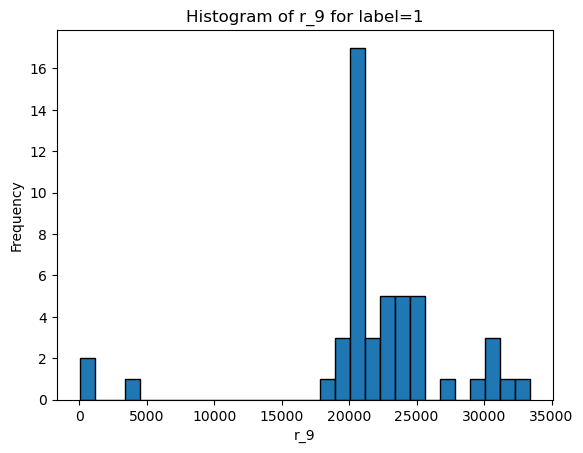

In [29]:
import matplotlib.pyplot as plt

# label이 1인 데이터의 r_9 히스토그램 그리기
plt.hist(data[data['label'] == 1]['r_9'], bins=30, edgecolor='k')

# 히스토그램 제목과 축 레이블 설정
plt.title("Histogram of r_9 for label=1")
plt.xlabel("r_9")
plt.ylabel("Frequency")

# 그래프 출력
plt.show()

MB2에서는 초기 고장은 잘 안나는듯하다.

#### label = 1 인 데이터 중, 랜덤으로 3개에 대해서 feature plot 그려보기

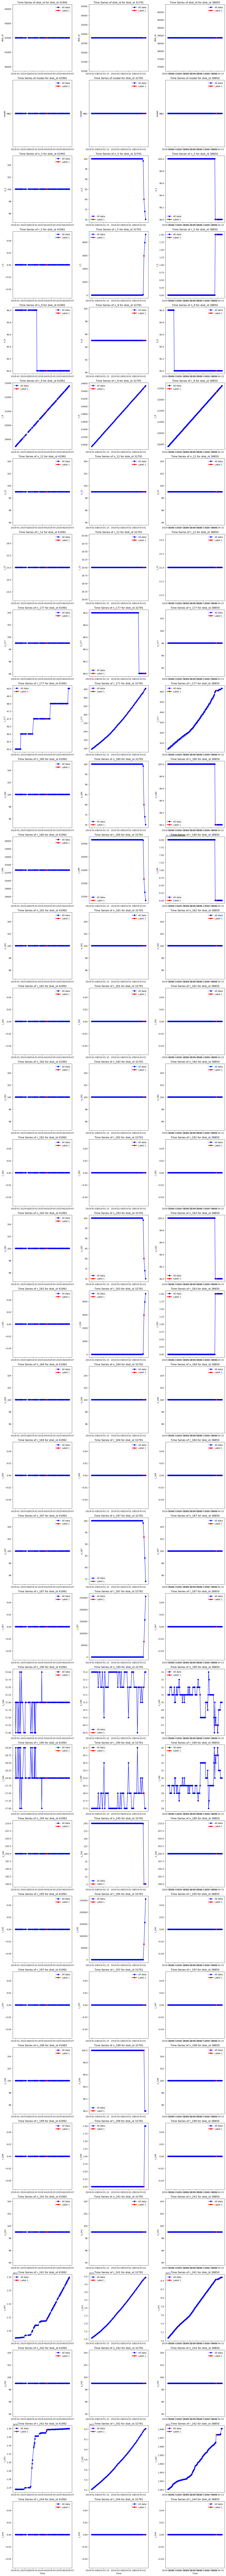

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

### label = 1 인 데이터 중, r_9값이 작은 순서대로 3개 feature plot 그려보기

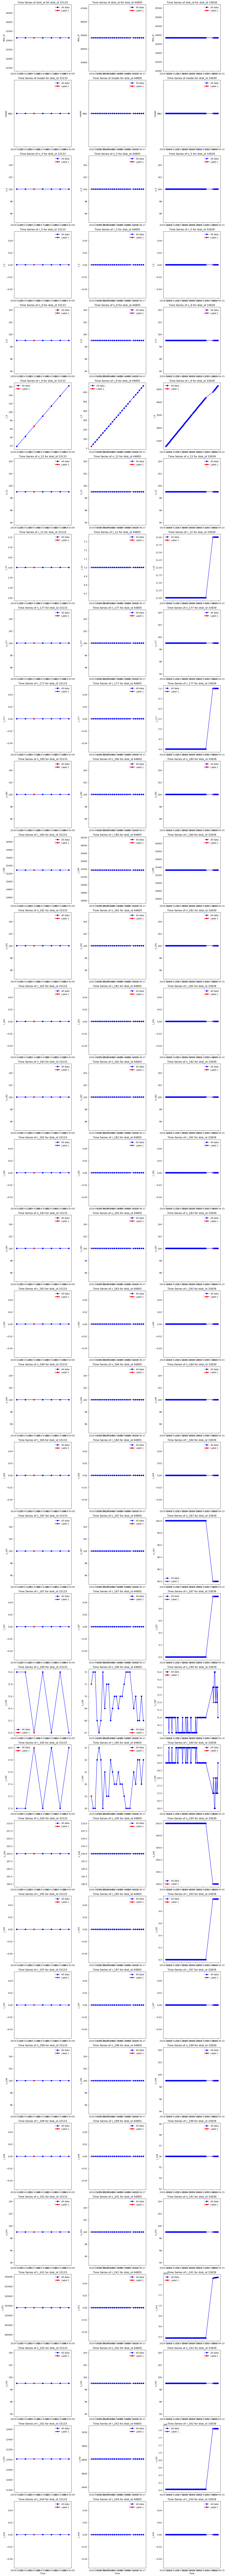

In [7]:
# label=1인 disk_id 선택
disk_ids = data[data["label"]==1]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

## healthy VS failed 각 feature별 히스토그램

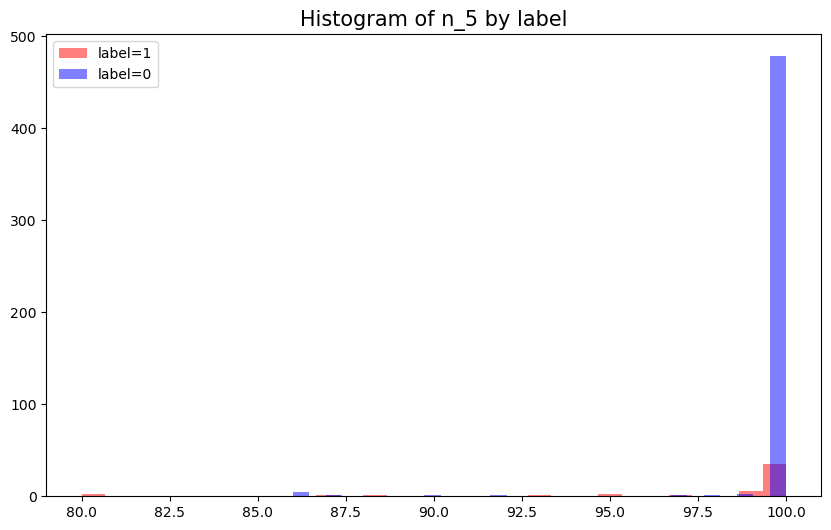

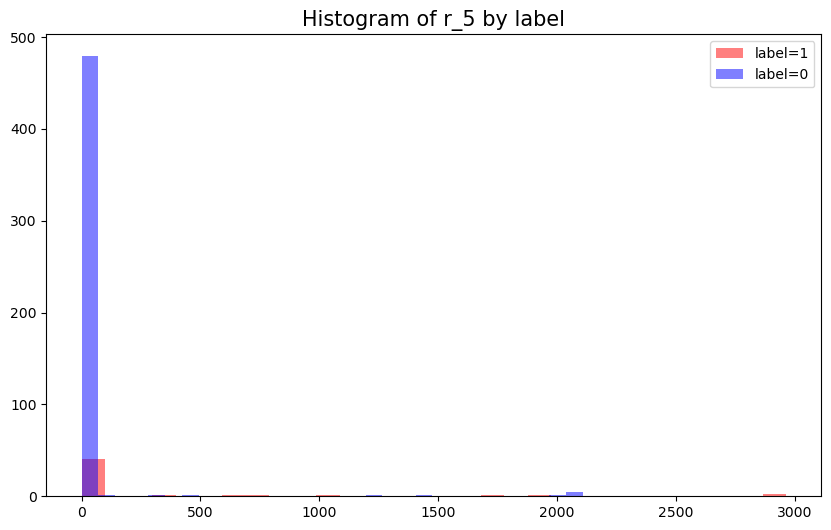

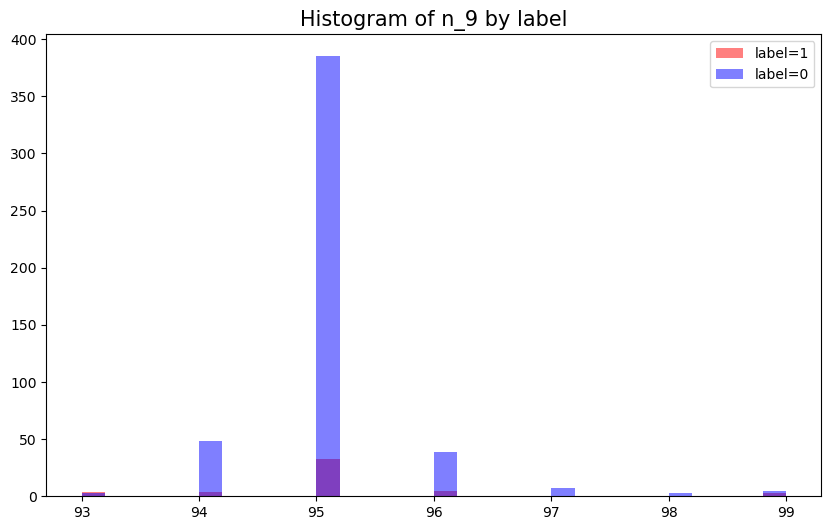

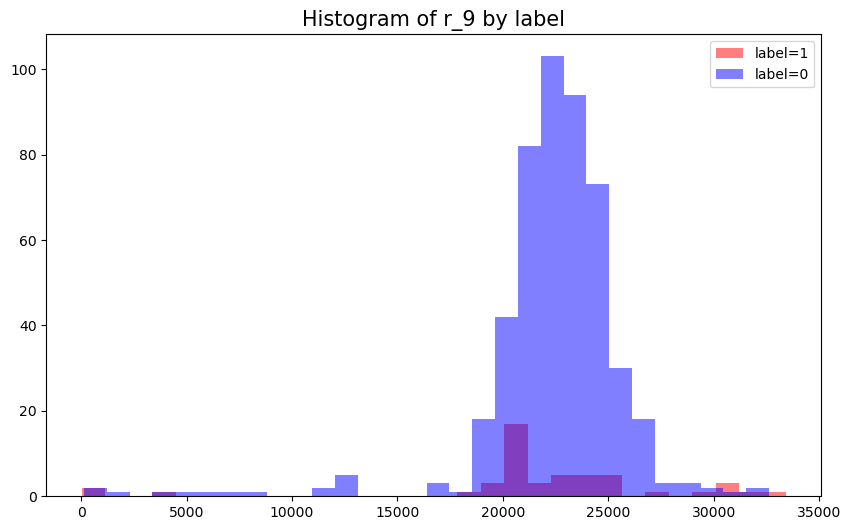

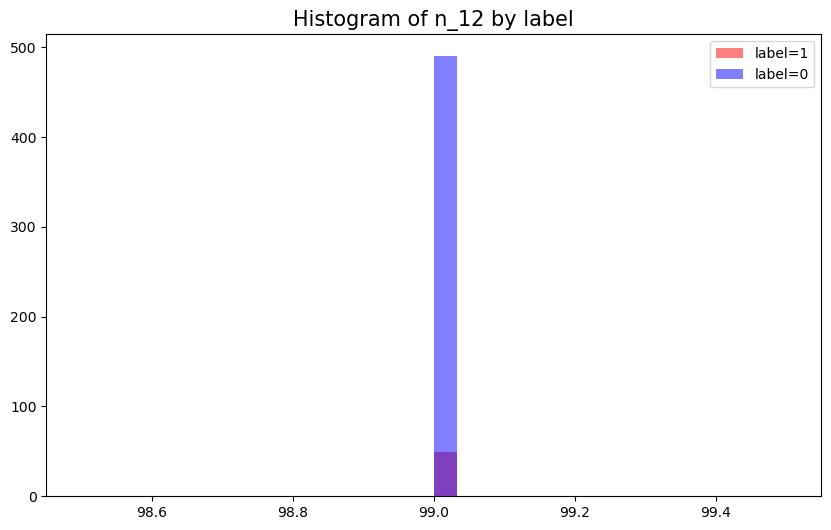

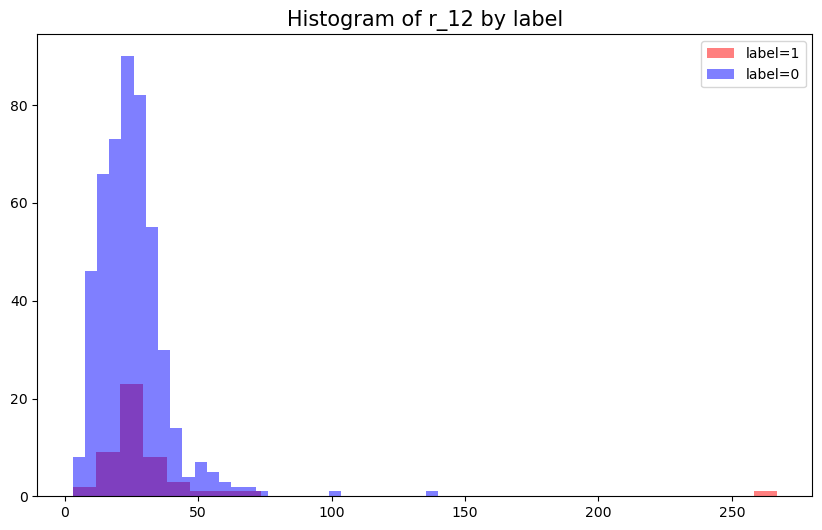

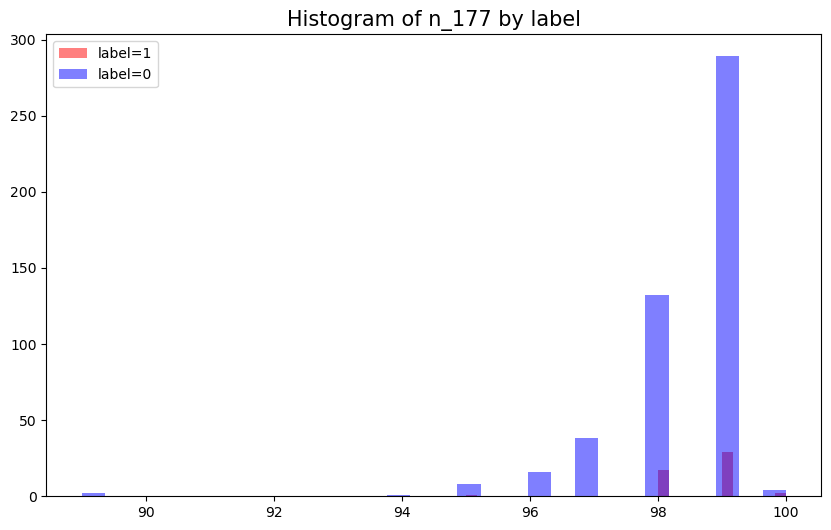

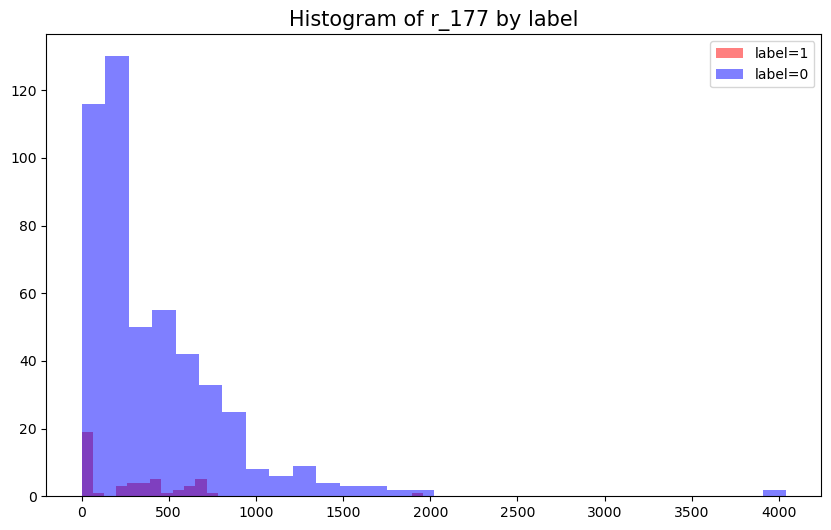

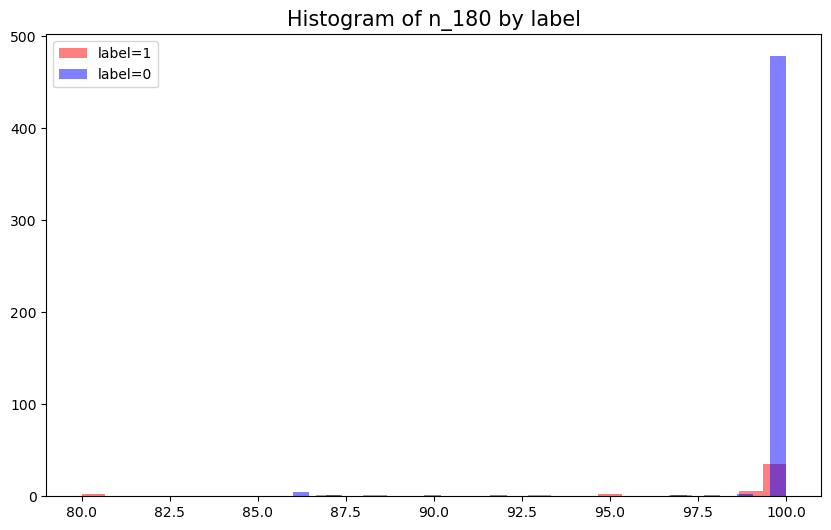

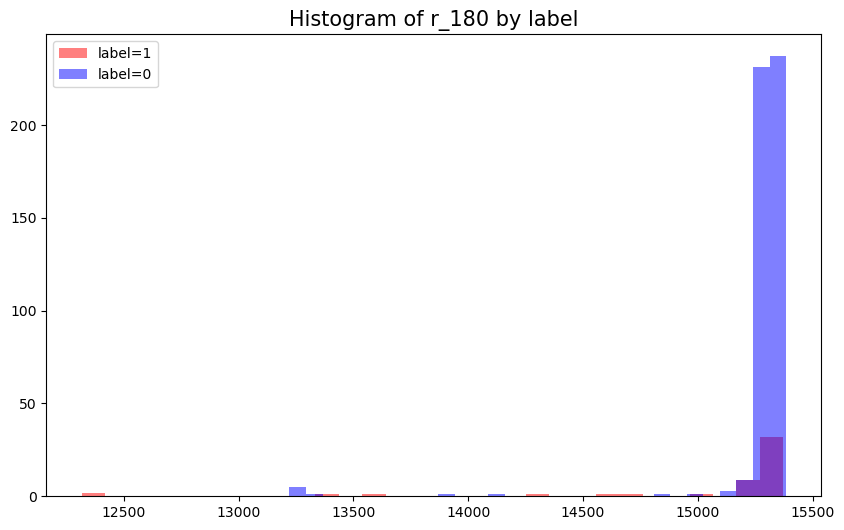

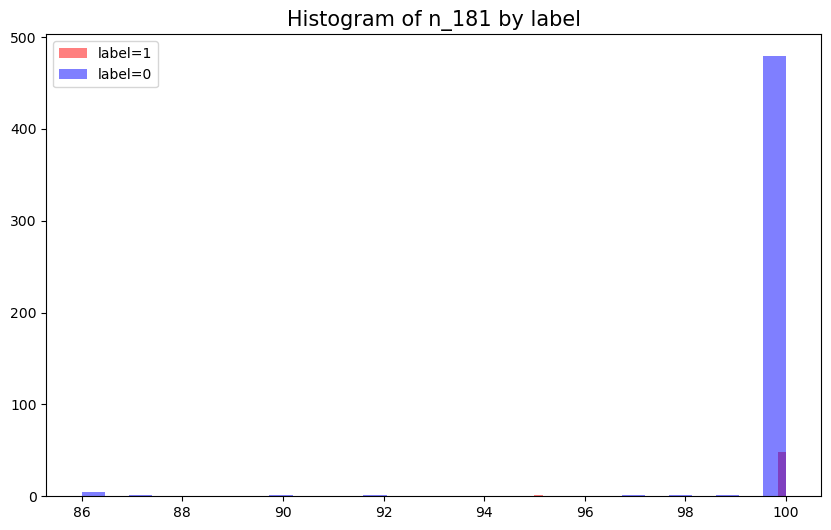

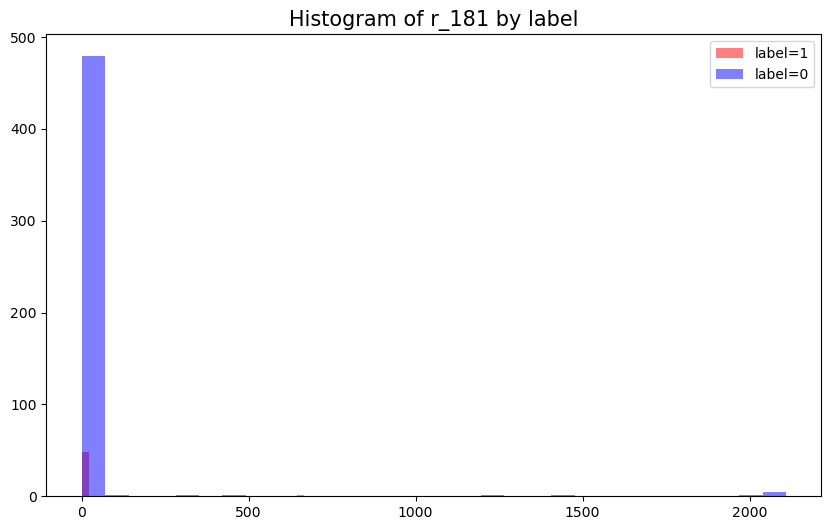

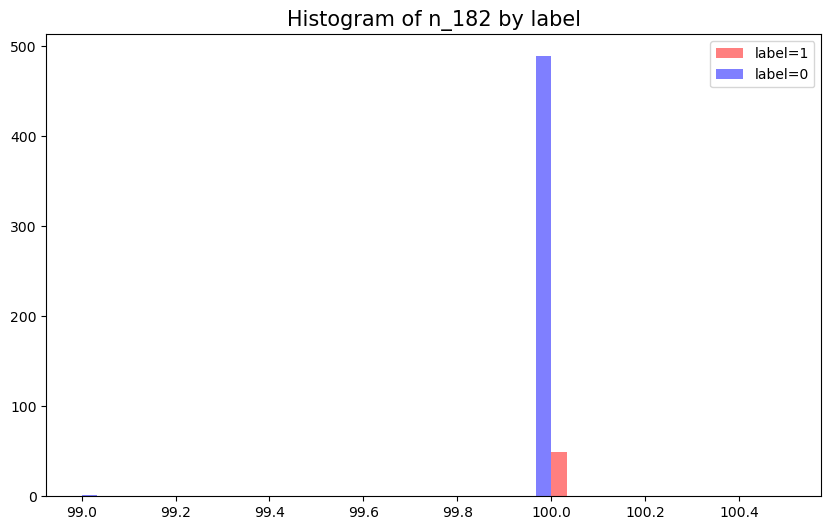

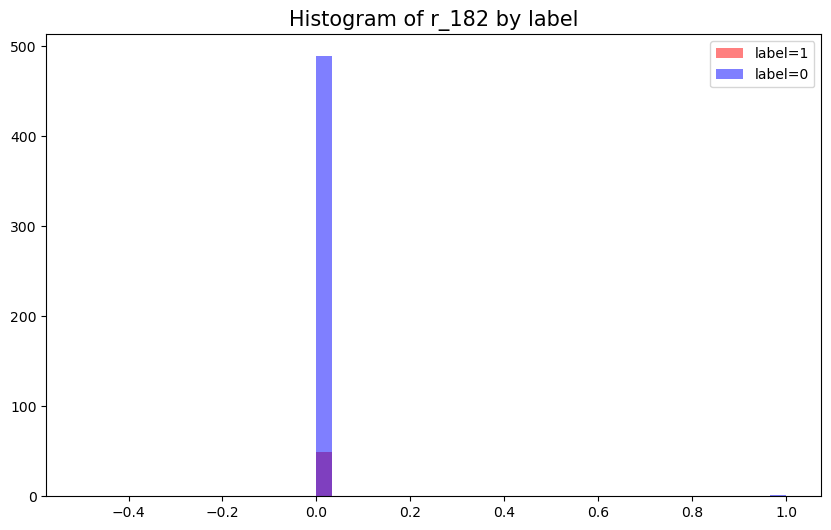

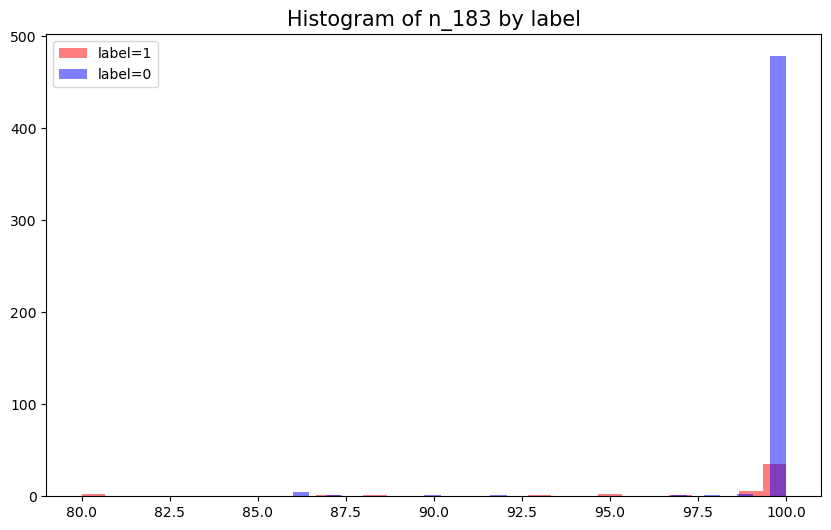

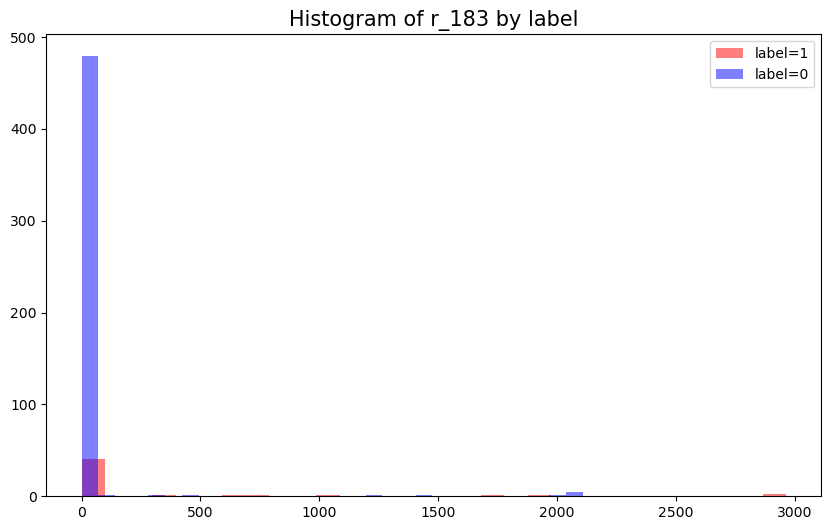

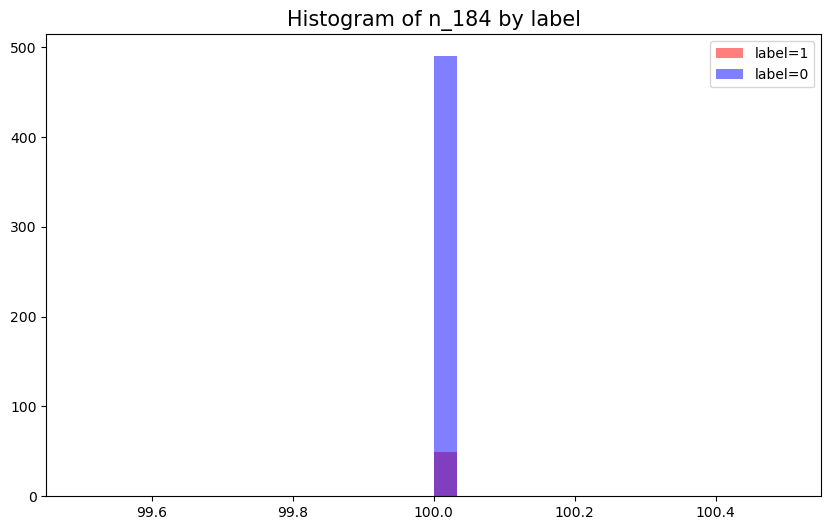

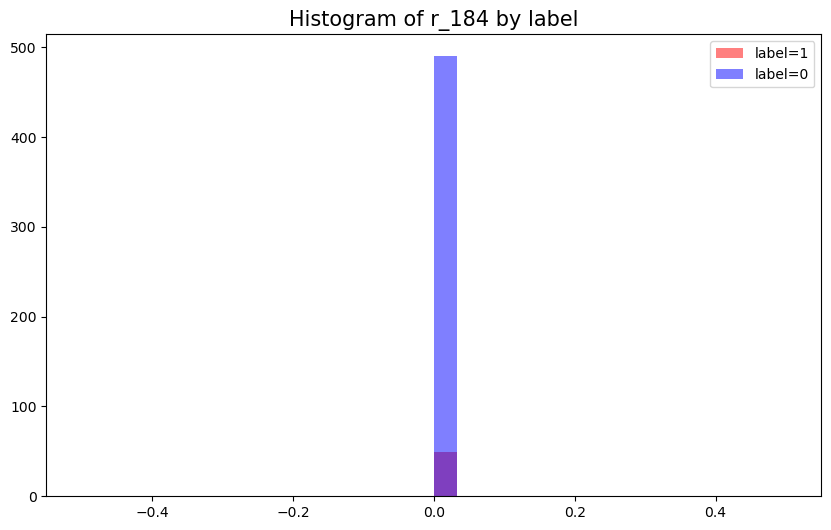

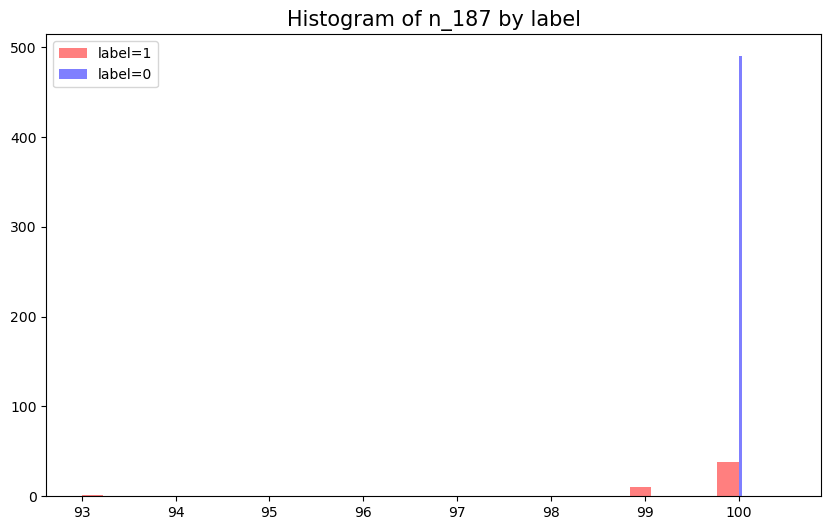

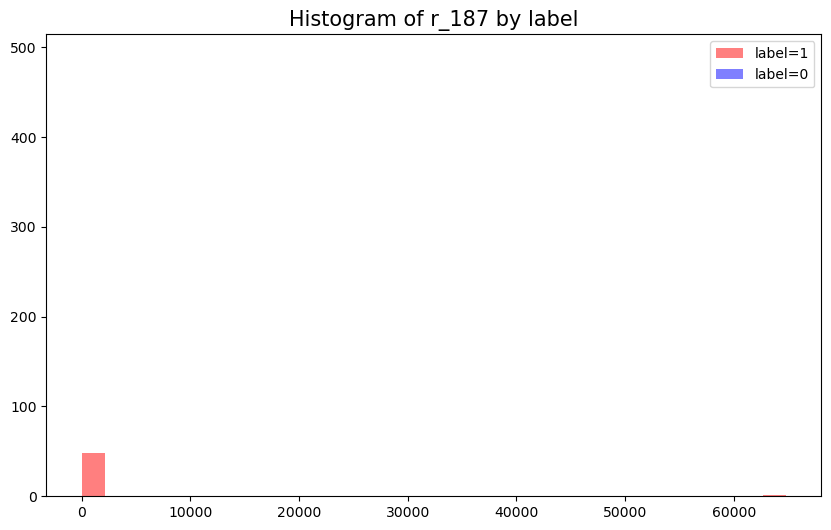

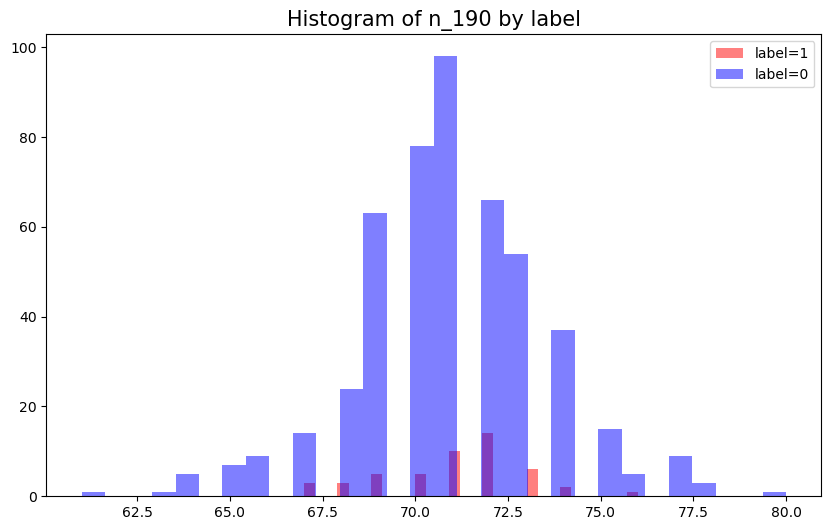

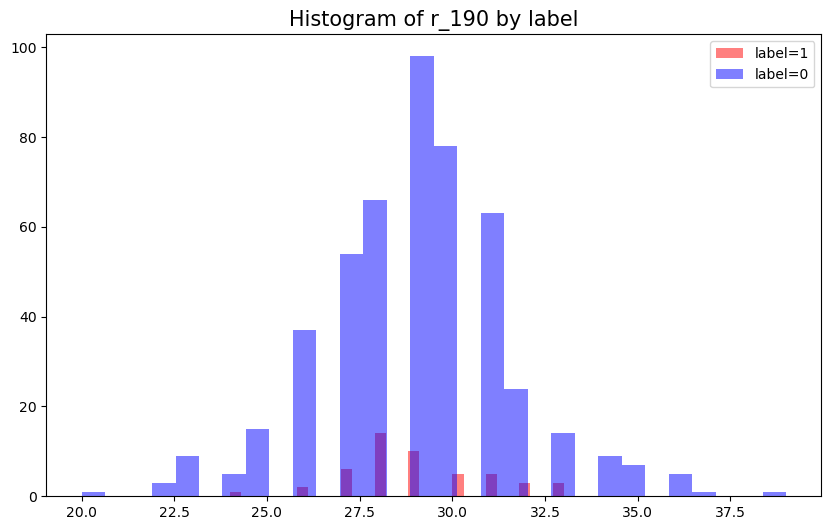

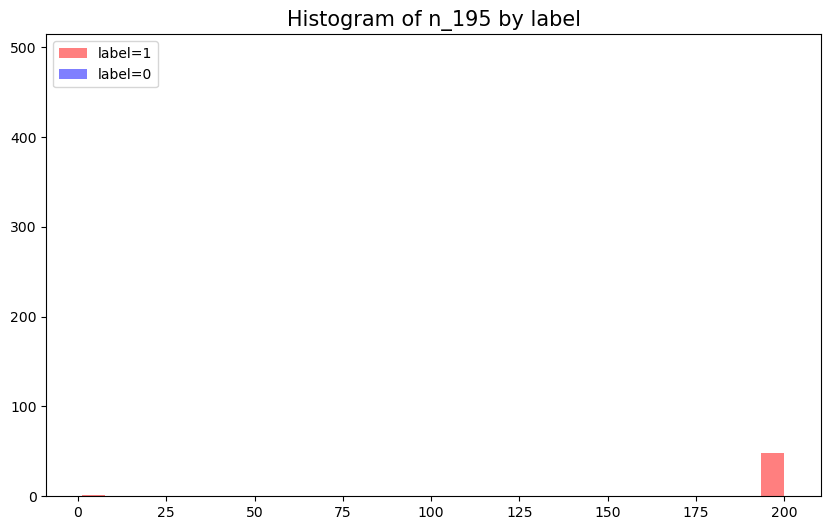

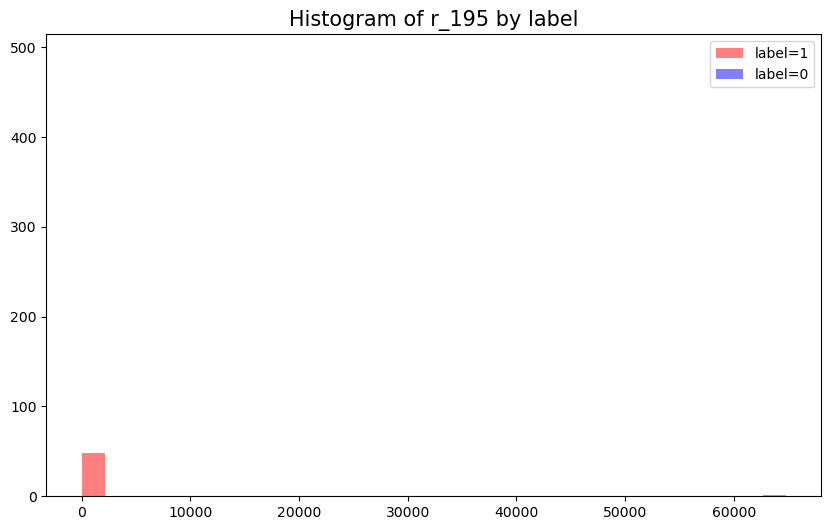

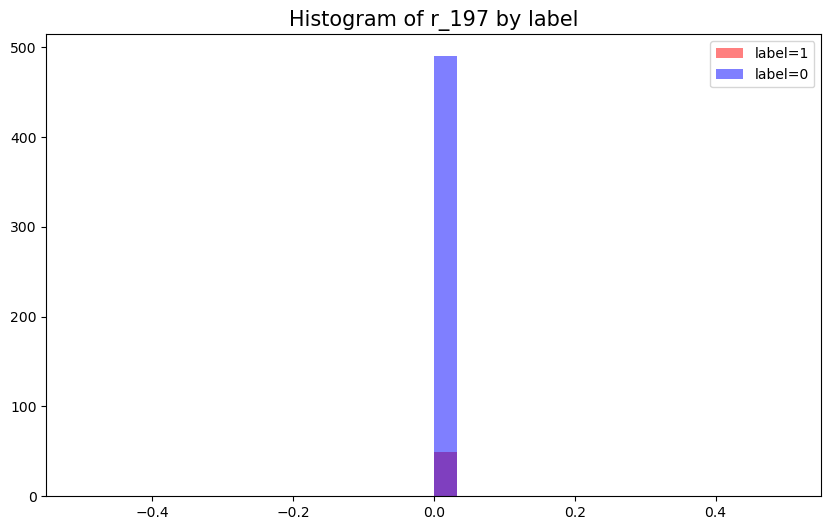

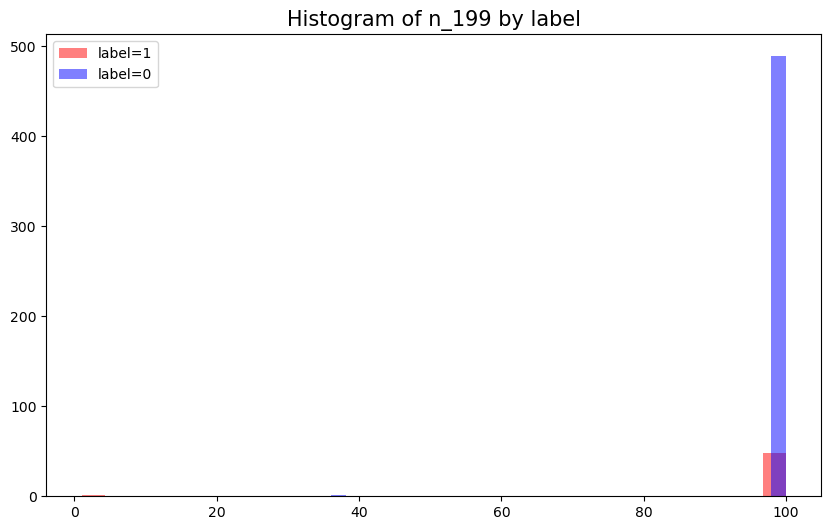

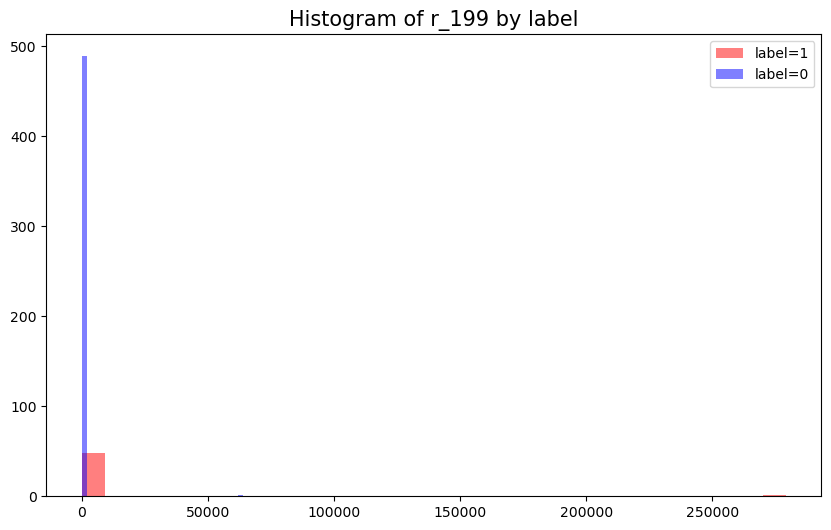

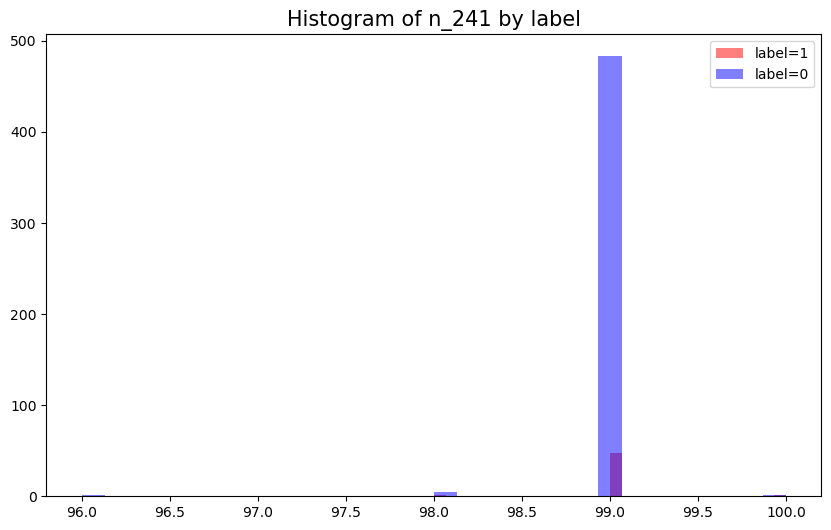

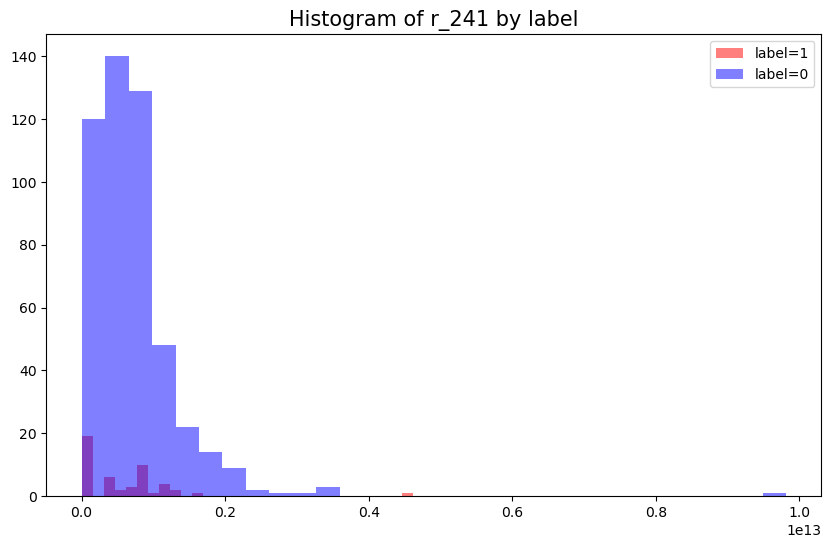

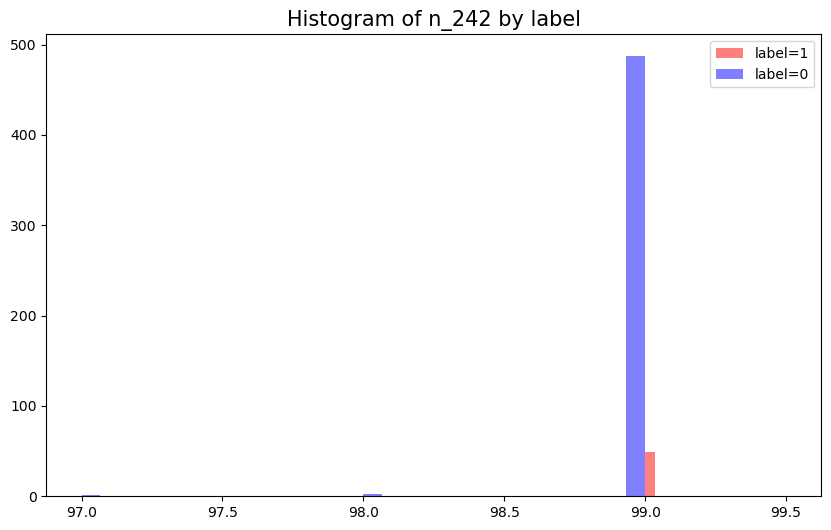

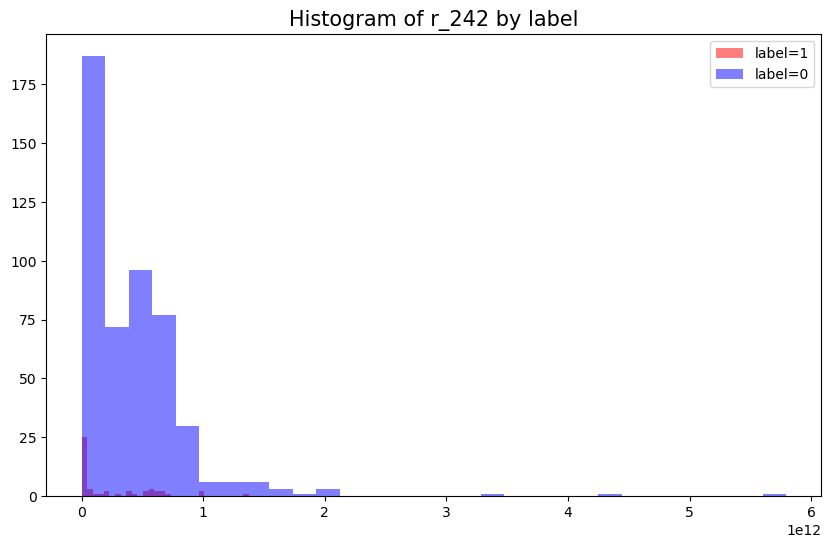

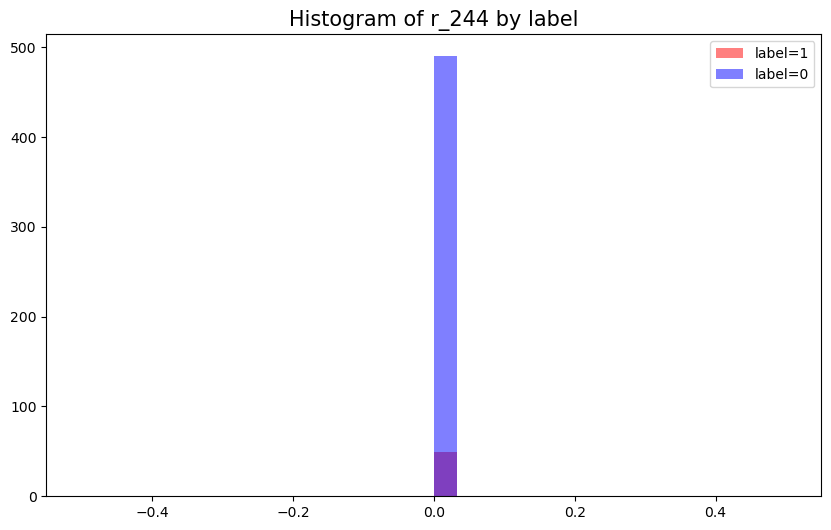

In [18]:
import numpy as np

# 'label' 컬럼을 제외한 피처들만 선택합니다.
features = [col for col in features_data.columns if col != 'label']

# 라벨 0과 1에 대해 같은 수의 샘플을 무작위로 선택합니다.
# 여기서는 라벨 1의 데이터 수를 기준으로 합니다.
n_samples = features_data[features_data['label'] == 1].shape[0]
label0_data = features_data[features_data['label'] == 0].sample(n_samples*10)
label1_data = features_data[features_data['label'] == 1]

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # label=1인 데이터의 히스토그램 그리기 
    plt.hist(label1_data[feature].dropna(), color='r', alpha=0.5, bins=30)
    
    # label=0인 데이터의 히스토그램 그리기 
    plt.hist(label0_data[feature].dropna(), color='b', alpha=0.5, bins=30)
    
    plt.title('Histogram of ' + feature + ' by label', fontsize=15)
    plt.legend(['label=1', 'label=0'])
    plt.show()